<center><font size=6>Course Project</font></center>

<center><font size=5>CS6491 Top in Optmztn & its Apns inCS</font></center>
<center><font size=3>Hongzong LI</font></center>
<center><font size=3>Student ID: 56609812</font></center>

In [110]:
# import essential packages
import numpy as np
import pandas as pd
import cvxpy as cvx
from matplotlib import pyplot as plt

In [111]:
def alternative_nmf(V, r,  MAX_ITERS=100):
    # Generate random data matrix V.
    m, n = V.shape

    # Initialize W randomly.
    W_init = np.random.rand(m,r)
    W = W_init

    # Perform alternating minimization.
    all_objective_value = []
    for iter_num in range(1, 1 + MAX_ITERS):
        # For odd iterations, treat H constant, optimize W (Solve the convex optimization problem (1)).
        if iter_num % 2 == 1:
            H = cvx.Variable((r, n), nonneg=True)

        # For even iterations, treat W constant, optimize H (Solve the convex optimization problem (2)).
        else:
            W = cvx.Variable((m, r), nonneg=True)           
        
        # Calculate the error accroding to error=V-WH
        error = V - (W @ H)
        
        # Define the objective function
        obj = cvx.Minimize(cvx.norm(error,'fro'))       

        # Input the problem
        prob = cvx.Problem(obj)

        # Solve the problem by SCS
        prob.solve(solver=cvx.SCS)

        if prob.status != cvx.OPTIMAL:
            pass
       
        # Save the objective function value
        all_objective_value.append(prob.value)
      
        if iter_num % 2 == 1:
            H = H.value
        else:
            W = W.value

        # If the objective function is equal to 0, meaning that the NMF is solved. Therefore, break the loop
        if prob.value < 1e-4:
            break
        
    return W, H, all_objective_value

In [112]:
# set the problem parameters
r, n, m = 2, 5, 10

# randomly generate data
np.random.seed(0)
W_true = np.random.rand(n, r) #30*2
H_ture_1 = np.random.rand(r, int(m/2))
H_true_2 = 2* np.random.rand(r, int(m/2))
H_true = np.hstack([H_ture_1, H_true_2])
# Normalization
H_true = H_true/np.max(H_true) #2*12
# generate V accroding to V=WH
V = np.dot(W_true, H_true) #30*12
pd.DataFrame(V)

,0,1,2,3,4,5,6,7,8,9
0,0.253839,0.155691,0.463527,0.543884,0.337828,1.016478,0.552936,0.949178,0.819099,0.369370
1,0.268081,0.168511,0.406735,0.501687,0.264083,0.959064,0.572046,0.810221,0.771313,0.303728
2,0.200126,0.121154,0.397724,0.457145,0.302483,0.846007,0.440579,0.823267,0.682323,0.324882
3,0.216708,0.127459,0.506365,0.561490,0.412284,1.020720,0.487974,1.067186,0.824550,0.430750
4,0.406882,0.264367,0.442800,0.608174,0.205419,1.214396,0.843114,0.824566,0.973071,0.278939


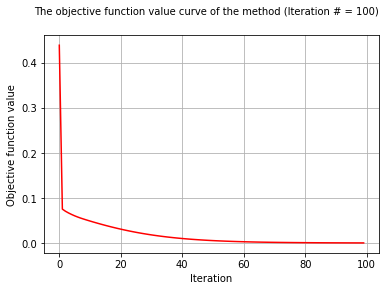

Wall time: 649 ms


In [113]:
%%time

W, H, all_objective_value = alternative_nmf(V, r, MAX_ITERS=100)

# Plot the objective function value curve of the method
fig = plt.figure()
fig.suptitle('The objective function value curve of the method (Iteration # = %d)' % (len(all_objective_value)), fontsize=10)
ax = fig.add_subplot(111)
lns = ax.plot(all_objective_value, 'r')
labs = [l.get_label() for l in lns]
ax.grid()
ax.set_xlabel('Iteration')
ax.set_ylabel('Objective function value')
plt.savefig( 'Result_c.pdf' )
plt.show()

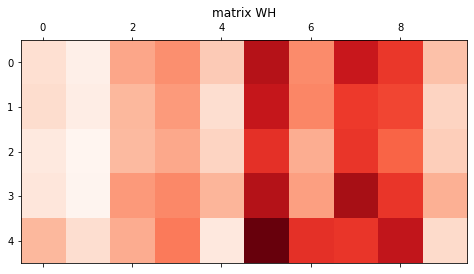

In [114]:
plt.matshow((W@H), cmap=plt.cm.Reds)
plt.title("matrix WH")
plt.savefig( 'Result_r.pdf' )
plt.show()

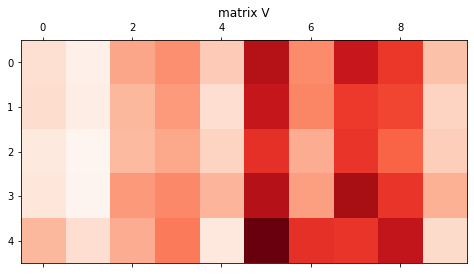

In [115]:
plt.matshow(V, cmap=plt.cm.Reds)
plt.title("matrix V")
plt.savefig( 'Result_v.pdf' )
plt.show()

In [116]:
pd.DataFrame(W)

,0,1
0,0.441359,0.679143
1,0.748234,0.530981
2,0.237980,0.608054
3,0.000000,0.828658
4,1.730289,0.413280


In [117]:
pd.DataFrame(H)

,0,1,2,3,4,5,6,7,8,9
0,0.172695,0.116054,0.109947,0.189639,0.000000,0.407630,0.346625,0.168918,0.324704,0.037038
1,0.261532,0.153825,0.611066,0.677597,0.497422,1.231797,0.588903,1.287839,0.995060,0.519808


In [118]:
pd.DataFrame(W@H)

,0,1,2,3,4,5,6,7,8,9
0,0.253838,0.155691,0.463528,0.543884,0.337821,1.016478,0.552935,0.949181,0.819099,0.369371
1,0.268085,0.168514,0.406731,0.501685,0.264122,0.959064,0.572053,0.810208,0.771312,0.303721
2,0.200124,0.121152,0.397726,0.457146,0.302459,0.846007,0.440574,0.823275,0.682323,0.324886
3,0.216721,0.127468,0.506365,0.561496,0.412193,1.020738,0.487999,1.067178,0.824565,0.430743
4,0.406899,0.264380,0.442781,0.608167,0.205574,1.214395,0.843143,0.824515,0.973069,0.278913


In [119]:
pd.DataFrame(V)

,0,1,2,3,4,5,6,7,8,9
0,0.253839,0.155691,0.463527,0.543884,0.337828,1.016478,0.552936,0.949178,0.819099,0.369370
1,0.268081,0.168511,0.406735,0.501687,0.264083,0.959064,0.572046,0.810221,0.771313,0.303728
2,0.200126,0.121154,0.397724,0.457145,0.302483,0.846007,0.440579,0.823267,0.682323,0.324882
3,0.216708,0.127459,0.506365,0.561490,0.412284,1.020720,0.487974,1.067186,0.824550,0.430750
4,0.406882,0.264367,0.442800,0.608174,0.205419,1.214396,0.843114,0.824566,0.973071,0.278939


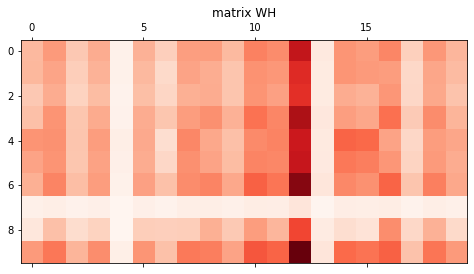

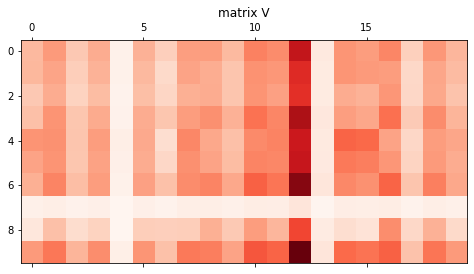

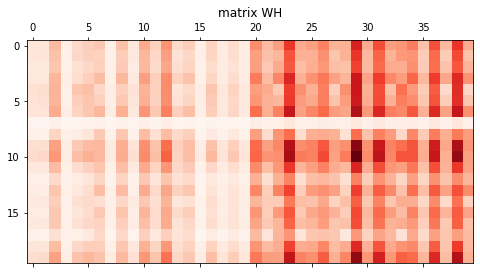

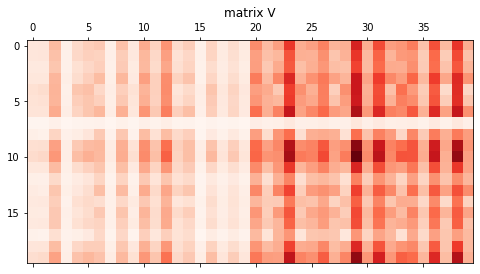

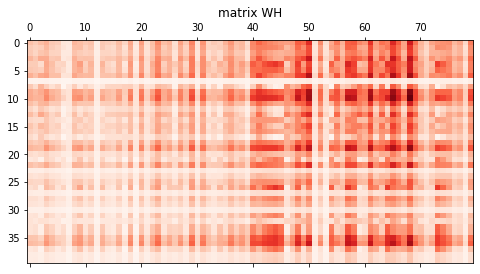

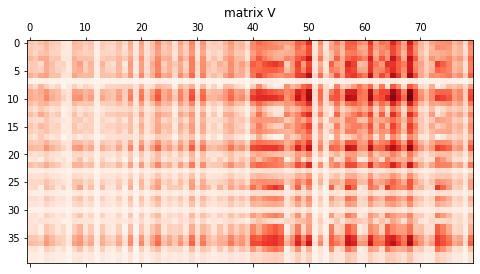

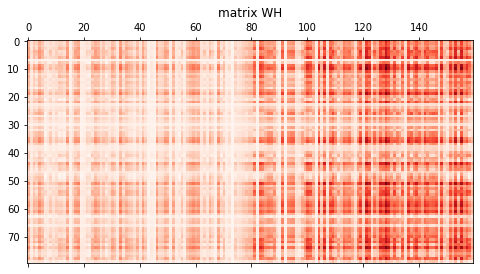

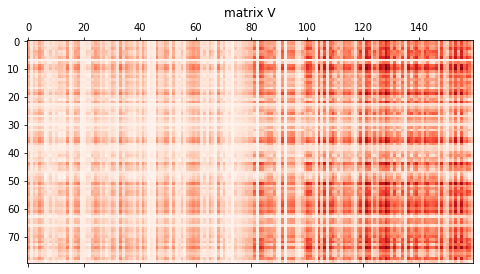

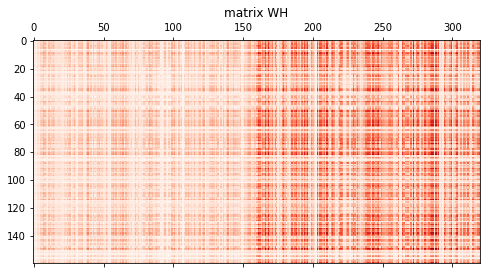

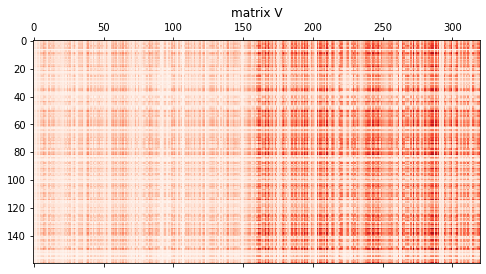

In [133]:
# set the problem parameters
r=2
n_list=[10,20,40,80,160]
m_list=[20,40,80,160,320]
for i in range(5):
    m=m_list[i]
    n=n_list[i]
    # randomly generate data
    np.random.seed(0)
    W_true = np.random.rand(n, r) #30*2
    H_ture_1 = np.random.rand(r, int(m/2))
    H_true_2 = 2* np.random.rand(r, int(m/2))
    H_true = np.hstack([H_ture_1, H_true_2])
    # Normalization
    H_true = H_true/np.max(H_true) #2*12
    # generate V accroding to V=WH
    V = np.dot(W_true, H_true) #30*12

    W, H, all_objective_value = alternative_nmf(V, r, MAX_ITERS=100)

    plt.matshow((W@H), cmap=plt.cm.Reds)
    plt.title("matrix WH")
    fig_name='result_r_n{}_m{}.pdf'.format(n,m)
    plt.savefig(fig_name)
    plt.show()

    plt.matshow(V, cmap=plt.cm.Reds)
    plt.title("matrix V")
    fig_name='result_v_n{}_m{}.pdf'.format(n,m)
    plt.savefig(fig_name)
    plt.show()

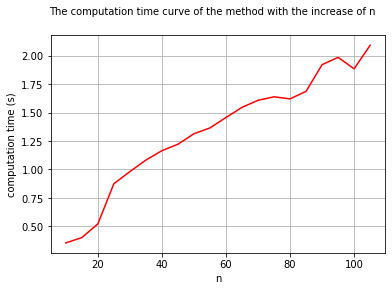

In [143]:
import time

# set the problem parameters
r=2
m=30
# n increase linearly
n_list=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105] 
time_list= np.zeros(20)
for i in range(20):
    n=n_list[i]
    # randomly generate data
    np.random.seed(0)
    W_true = np.random.rand(n, r) #30*2
    H_ture_1 = np.random.rand(r, int(m/2))
    H_true_2 = 2* np.random.rand(r, int(m/2))
    H_true = np.hstack([H_ture_1, H_true_2])
    # Normalization
    H_true = H_true/np.max(H_true) #2*12
    # generate V accroding to V=WH
    V = np.dot(W_true, H_true) #30*12

    # record the start time
    start_time = time.time()
    times=10
    for t in range(times):
        W, H, all_objective_value = alternative_nmf(V, r, MAX_ITERS=100)
    # record the end time
    end_time = time.time()
    time_list[i]=((end_time-start_time)/10.0)

# Plot the computation time curve of the method with the increase of n
fig = plt.figure()
fig.suptitle('The computation time curve of the method with the increase of n', fontsize=10)
ax = fig.add_subplot(111)
lns = ax.plot(n_list,time_list, 'r')
labs = [l.get_label() for l in lns]
ax.grid()
ax.set_xlabel('n')
ax.set_ylabel('computation time (s)')
plt.savefig( 'Result_time.pdf' )
plt.show()
